In [ ]:
import cv2
import numpy as np
from openvino.inference_engine import IECore

# Load the pre-trained ViT model
model_xml = "path/to/model.xml"
model_bin = "path/to/model.bin"
ie = IECore()
net = ie.read_network(model=model_xml, weights=model_bin)
input_blob = next(iter(net.input_info))
output_blob = next(iter(net.outputs))
exec_net = ie.load_network(network=net, device_name="CPU", num_requests=1)

# Define the input image size and resize the input image accordingly
input_shape = net.input_info[input_blob].input_data.shape
img = cv2.imread("path/to/input/image.jpg")
img = cv2.resize(img, (input_shape[3], input_shape[2]))

# Preprocess the input image
img = img.transpose((2, 0, 1))  # Change data layout from HWC to CHW
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img.astype(np.float32)  # Convert data type to float32
img /= 255.0  # Normalize pixel values to [0, 1]

# Run inference on the input image
results = exec_net.infer(inputs={input_blob: img})
output = results[output_blob]

# Post-process the output to get the detected object bounding boxes and labels
class_idx = np.argmax(output[0], axis=1)
class_scores = np.max(output[0], axis=1)
boxes = output[1][0]

# Display the detected objects on the input image
for i in range(len(class_idx)):
    if class_scores[i] > 0.5:  # Only display objects with a high enough confidence score
        xmin, ymin, xmax, ymax = boxes[i]
        xmin = int(xmin * img.shape[3])
        ymin = int(ymin * img.shape[2])
        xmax = int(xmax * img.shape[3])
        ymax = int(ymax * img.shape[2])
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 


In [ ]:
write a code to use vision in transformer with openvino for object detection 

In [ ]:
import cv2
import numpy as np
from openvino.inference_engine import IECore

# Load the Transformer model
model_xml = 'path/to/transformer/model.xml'
model_bin = 'path/to/transformer/model.bin'
ie = IECore()
net = ie.read_network(model=model_xml, weights=model_bin)
exec_net = ie.load_network(network=net, device_name='CPU', num_requests=1)

# Load an input image
image_path = 'path/to/input/image.jpg'
image = cv2.imread(image_path)

# Preprocess the input image
input_blob = next(iter(net.input_info))
input_shape = net.input_info[input_blob].input_data.shape
resized_image = cv2.resize(image, (input_shape[3], input_shape[2]))
resized_image = np.transpose(resized_image, (2, 0, 1))  # HWC to CHW
resized_image = resized_image.reshape(input_shape)

# Run inference
outputs = exec_net.infer(inputs={input_blob: resized_image})

# Process the outputs
output_blob = next(iter(net.outputs))
output = outputs[output_blob]
boxes = output[0][0]
scores = output[0][1]
classes = output[0][2]
num_detections = int(output[0][3])

# Draw the detected objects on the input image
for i in range(num_detections):
    if scores[i] > 0.5:  # Filter out low-confidence detections
        left = int(boxes[i][0] * image.shape[1])
        top = int(boxes[i][1] * image.shape[0])
        right = int(boxes[i][2] * image.shape[1])
        bottom = int(boxes[i][3] * image.shape[0])
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        class_id = int(classes[i])
        label = f"Class {class_id}, {scores[i]:.2f}"
        cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the output image
cv2.imshow('Object Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import openvino.inference_engine as ie

# Define input shape of ViT model
input_shape = (1, 3, 224, 224)

# Load ViT model with OpenVINO
model_xml = 'vit_model.xml'
model_bin = 'vit_model.bin'
ie_core = ie.IECore()
net = ie_core.read_network(model=model_xml, weights=model_bin)

# Get input and output nodes of the network
input_blob = next(iter(net.input_info))
output_blob = next(iter(net.outputs))

# Create executable network
exec_net = ie_core.load_network(network=net, device_name='CPU')

# Load COCO class labels
with open('coco_labels.txt', 'r') as f:
    class_labels = [line.strip() for line in f.readlines()]

# Load image and preprocess
image = cv2.imread('image.jpg')
image = cv2.resize(image, (input_shape[3], input_shape[2]))
image = image.transpose((2, 0, 1))  # Change image from HWC to CHW
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = image.astype(np.float32) / 255.0  # Normalize input data
image = np.ascontiguousarray(image)

# Run inference
outputs = exec_net.infer(inputs={input_blob: image})

# Parse object detection results
detections = outputs[output_blob][0][0]
detections = detections[detections[:, 2] > 0.5]  # Filter out low-confidence detections
for detection in detections:
    class_id = int(detection[1])
    score = detection[2]
    bbox = detection[3:7] * np.array([image.shape[3], image.shape[2], image.shape[3], image.shape[2]])
    bbox = bbox.astype(np.int32)
    label = class_labels[class_id]
    
    # Draw bounding box on image
    cv2.rectangle(image[0], (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
    cv2.putText(image[0], f'{label} {score:.2f}', (bbox[0], bbox[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display results
cv2.imshow('Object detection', image[0])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import argparse
import torch
import onnx
from onnx_tf.backend import prepare
from mo_pytorch import pytorch2ir

parser = argparse.ArgumentParser(description='Convert a ViT model to OpenVINO format')
parser.add_argument('--model', required=True, help='Path to the ViT model file')
parser.add_argument('--input_shape', default='1,3,224,224', help='Input shape of the model in NCHW format')
parser.add_argument('--output_dir', default='openvino_model', help='Directory to save the OpenVINO model files')
parser.add_argument('--data_type', default='FP16', choices=['FP32', 'FP16'], help='Data type for the model')

args = parser.parse_args()

# Load the PyTorch ViT model
model = torch.load(args.model)

# Convert the PyTorch model to ONNX format
dummy_input = torch.randn((1, 3, 224, 224))
input_names = ['input']
output_names = ['output']
torch.onnx.export(model, dummy_input, 'vit_model.onnx', input_names=input_names, output_names=output_names, opset_version=12)

# Convert the ONNX model to TensorFlow format
onnx_model = onnx.load('vit_model.onnx')
tf_model = prepare(onnx_model)

# Convert the TensorFlow model to OpenVINO IR format
ir_model = pytorch2ir(tf_model, input_shape=args.input_shape, data_type=args.data_type)

# Save the OpenVINO IR model files
with open(f'{args.output_dir}/vit_model.xml', 'w') as f:
    f.write(ir_model.get_xml())
with open(f'{args.output_dir}/vit_model.bin', 'wb') as f:
    f.write(ir_model.get_weights())

print(f'Successfully converted ViT model to OpenVINO format and saved files to {args.output_dir}')


In [ ]:
python convert_vit_to_openvino.py --model vit_model.pt --input_shape 1,3,224,224 --output_dir openvino_model --data_type FP16


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 26.4 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision.transforms as T
import timm

# Load the pre-trained ViT model from the timm library
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=0, global_pool='')

# Define the input image transformation pipeline
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])




In [6]:
from PIL import *

In [ ]:
# Load an input image
image = Image.open('img.jpg')

# Preprocess the input image
input_tensor = transform(image).unsqueeze(0)



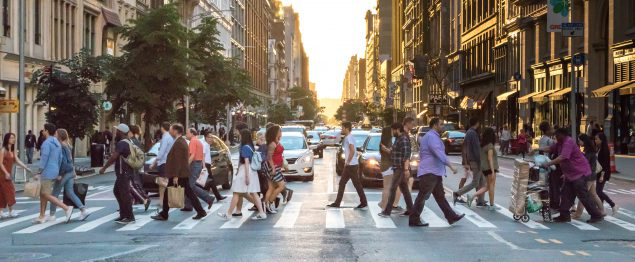

In [ ]:
image

In [ ]:
input_tensor

tensor([[[[ 0.1768, -1.0562, -0.9363,  ..., -1.4329, -1.5357, -1.5699],
          [ 0.1939, -1.0219, -0.8849,  ..., -1.4329, -1.5357, -1.5870],
          [ 0.2111, -1.0048, -0.8507,  ..., -1.4158, -1.5357, -1.5699],
          ...,
          [-0.3198, -0.2684, -0.1486,  ...,  0.0569,  0.0227, -0.0629],
          [-0.1486, -0.1314, -0.0629,  ...,  0.1083,  0.0741,  0.0056],
          [-0.0801, -0.1314, -0.0801,  ...,  0.0741,  0.0912,  0.0569]],

         [[ 0.2402, -1.0378, -0.9328,  ..., -1.4930, -1.5980, -1.5980],
          [ 0.2577, -1.0028, -0.8803,  ..., -1.4930, -1.5980, -1.6155],
          [ 0.2402, -0.9853, -0.8452,  ..., -1.4930, -1.5805, -1.6155],
          ...,
          [ 0.1702,  0.2227,  0.3627,  ...,  0.5378,  0.4853,  0.3978],
          [ 0.3452,  0.3627,  0.4503,  ...,  0.5903,  0.5553,  0.4678],
          [ 0.4153,  0.3627,  0.4328,  ...,  0.5553,  0.5553,  0.5203]],

         [[ 0.2871, -0.8981, -0.8807,  ..., -1.3513, -1.4559, -1.4733],
          [ 0.3045, -0.8633, -

In [ ]:
# Run inference on the input image using the Faster R-CNN model with the features from the ViT model
model.eval()
with torch.no_grad():
    outputs = model(np.expand_dims(features, axis=0))
    
# Print the detected objects and their bounding boxes
print(outputs)

torch.Size([1, 197, 768])

In [ ]:
image1 = array(features).reshape(1,197,768,3)

NameError: ignored

In [ ]:
import numpy as np


In [ ]:
one = np.expand_dims(features, axis=0)

In [ ]:
one.shape

(1, 1, 197, 768)

In [2]:
!pip install vit-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.0 MB/s eta 0:00:00


In [15]:
# Load an input image
img = Image.open('img.jpg')

In [8]:
import torch
from vit_pytorch import ViT

v = ViT(
    image_size = 256,
    patch_size = 32,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

img = torch.randn(1, 3, 256, 256)

preds = v(img) # (1, 1000)

In [ ]:
preds

In [11]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.3 MB/s eta 0:00:00


In [12]:
from transformers import CLIPProcessor, CLIPModel

# load pretrained model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
# load preprocessor for model input
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

In [13]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def visualize_result(image:Image, labels:List[str], probs:np.ndarray, top:int = 5):
    """ 
    Utility function for visualization classification results
    params:
      image: input image
      labels: list of classification labels
      probs: model predicted softmaxed probabilities for each label
      top: number of the highest probability results for visualization
    returns:
      None
    """
    plt.figure(figsize=(64, 64))
    top_labels = np.argsort(-probs)[:min(top, probs.shape[0])]
    top_probs = probs[top_labels]
    plt.subplot(8, 8, 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(8, 8, 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs)
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [labels[index] for index in top_labels])
    plt.xlabel("probability") 

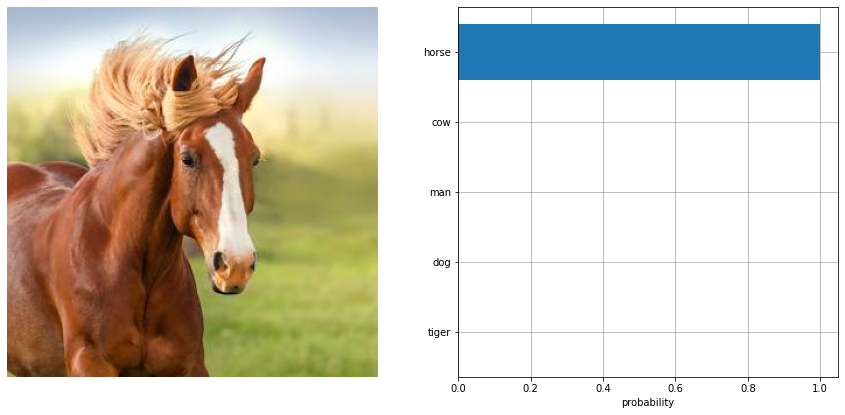

In [34]:
image = Image.open('download.jpg')
input_labels = ['cat', 'cow','dog', 'wolf', 'tiger', 'man', 'horse', 'frog', 'tree', 'house', 'computer']
text_descriptions = [f"This is a photo of a {label}" for label in input_labels]

inputs = processor(text=text_descriptions, images=[image], return_tensors="pt", padding=True)

results = model(**inputs)
logits_per_image = results['logits_per_image']  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1).detach().numpy()  # we can take the softmax to get the label probabilities
visualize_result(image, input_labels, probs[0])

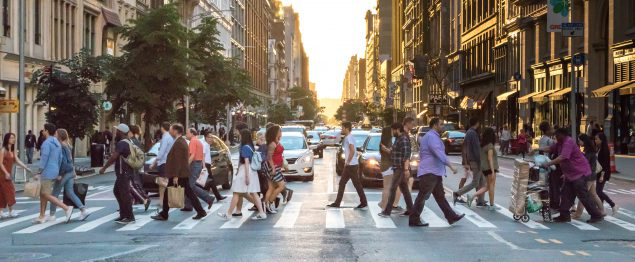

In [16]:
img

In [20]:
import torch

torch.onnx.export(
    model,  # model being run
    # model input in one of acceptable format: torch.Tensor (for single input), tuple or list of tensors for multiple inputs or dictionary with string keys and tensors as values.
    dict(inputs),
    "clip-vit-base-patch16.onnx",  # where to save the model
    opset_version=14,  # the ONNX version to export the model to
    input_names=["input_ids", "pixel_values", "attention_mask"],  # the model's input names
    output_names=["logits_per_image", "logits_per_text", "text_embeds", "image_embeds"],  # the model's output names
    dynamic_axes={  # variable length axes
        "input_ids": {0: "batch", 1: "sequence"},
        "pixel_values": {0: "batch", 1: "num_channels", 2: "height", 3: "width"},
        "attention_mask": {0: "batch", 1: "sequence"},
        "logits_per_image": {0: "batch"},
        "logits_per_text": {0: "batch"},
        "text_embeds": {0: "batch"},
        "image_embeds": {0: "batch"}
    }
)

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/modeling_clip.py:284: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_weights.size() != (bsz * self.num_heads, tgt_len, src_len):
/usr/local/lib/python3.8/dist-packages/transformers/models/clip/modeling_clip.py:324: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_output.size() != (bsz * self.num_heads, tgt_len, self.head_dim):
/usr/local/lib/python3.8/dist-packages/transformers/models/clip/modeling_clip.py:759: TracerWarning: torch.tensor results are registered as constants in 

In [23]:
from openvino.runtime import serialize
from openvino.tools import mo

ov_model = mo.convert_model('clip-vit-base-patch16.onnx', compress_to_fp16=True)
serialize(ov_model, 'clip-vit-base-patch16.xml')

In [ ]:
!pip install openvino-dev[ONNX,pytorch]==2022.3.0

In [31]:
image = Image.open('/content/download.jpg')

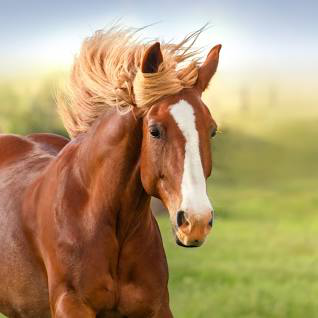

In [32]:
image

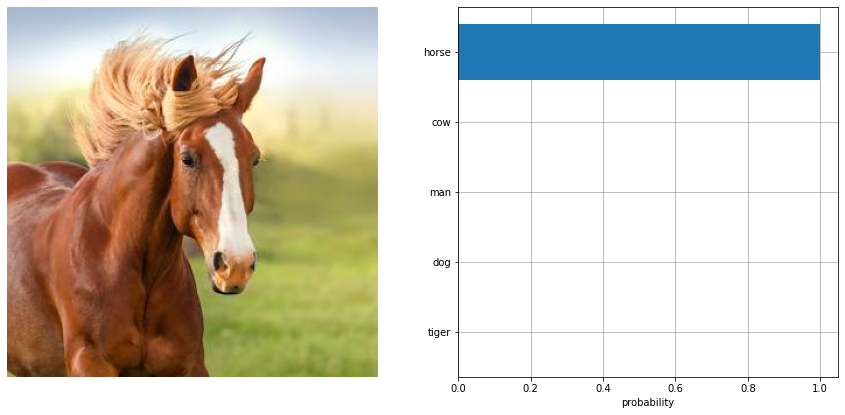

In [35]:
import numpy as np
from scipy.special import softmax
from openvino.runtime import Core

# create OpenVINO core object instance
core = Core()
# compile model for loading on device
compiled_model = core.compile_model(ov_model)
# obtain output tensor for getting predictions
logits_per_image_out = compiled_model.output(0)
# run inference on preprocessed data and get image-text similarity score
ov_logits_per_image = compiled_model(dict(inputs))[logits_per_image_out]
# perform softmax on score
probs = softmax(ov_logits_per_image, axis=1)
# visualize prediction
visualize_result(image, input_labels, probs[0])

In [38]:
import ipywidgets as widgets
style = {'description_width': 'initial'}

image_widget = widgets.FileUpload(
    accept='',
    multiple=False,
    description='Upload image',
    style=style
)

labels_widget = widgets.Textarea(
    value='cat,dog,bird',
    placeholder='Type something',
    description='Enter your classes separated by ,:',
    disabled=False,
    style=style
)
widgets.VBox(children=[image_widget, labels_widget])

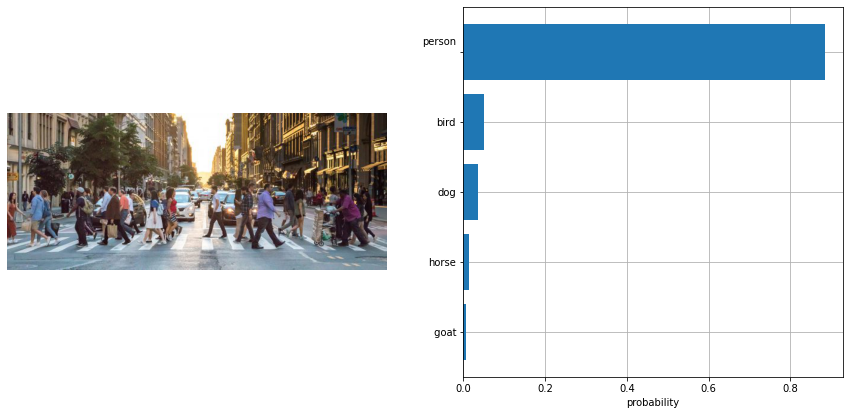

In [43]:
import io
# read uploaded image
image = Image.open('/content/img.jpg')
# obtain list of labels
labels = labels_widget.value.split(',')
# convert labels to text description
text_descriptions = [f"This is a photo of a {label}" for label in labels]

# preprocess input
inputs = processor(text=text_descriptions, images=[image], return_tensors="np", padding=True)
# run inference
ov_logits_per_image = compiled_model(dict(inputs))[logits_per_image_out]
# perform softmax on score
probs = softmax(ov_logits_per_image, axis=1)
# visualize prediction
visualize_result(image, labels, probs[0])

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
